# Hotel Review

In [1]:
import pandas as pd

In [204]:
import numpy as np

In [2]:
pd.set_option('max_columns',None)

In [4]:
df = pd.read_csv('Hotel_Reviews.csv')

In [5]:
df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [6]:
df.shape

(515738, 17)

## About Dataset
### Acknowledgements

The data was scraped from Booking.com. All data in the file is publicly available to everyone already. Please be noted that data is originally owned by Booking.com.

### Data Context

This dataset contains 515,000 customer reviews and scoring of hotels across Europe. Meanwhile, the geographical location of hotels are also provided for further analysis.

### Data Content

The csv file contains 17 fields. The description of each field is as below:

| VARIABLE | DESCRIPTION |
|----------| ----------- |
|Hotel_Address|Address of hotel.|
|Review_Date| Date when reviewer posted the corresponding review.|
|Average_Score| Average Score of the hotel, calculated based on the latest comment in the last year.|
|Hotel_Name| Name of Hotel|
|Reviewer_Nationality| Nationality of Reviewer|
|Negative_Review| Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'|
|ReviewTotalNegativeWordCounts| Total number of words in the negative review.|
|Positive_Review| the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'|
|ReviewTotalPositiveWordCounts| Total number of words in the positive review.|
|Reviewer_Score| Score the reviewer has given to the hotel, based on his/her experience|
|TotalNumberofReviewsReviewerHasGiven| Number of Reviews the reviewers has given in the past.|
|TotalNumberof_Reviews| Total number of valid reviews the hotel has.|
|Tags| Tags reviewer gave the hotel.
|dayssincereview| Duration between the review date and scrape date.|
|AdditionalNumberof_Scoring| There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.|
|lat| Latitude of the hotel|
|lng| longtitude of the hotel|


In [7]:
df.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [12]:
len(df['Hotel_Name'].unique())

1492

There are 1492 hotels in the dataset

### How many reviews have each hotel? 

In [27]:
df['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Le Lavoisier                                           12
Hotel Daniel Paris                                     12
Mercure Paris Porte d Orleans                          10
Hotel Wagner                                           10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

The last code shows the name of the hotel and how many reviews have each one... Let's see in a bar plot of the top 10 hotels with more reviews.

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Name: Hotel_Name, dtype: int64


<AxesSubplot:xlabel='Hotel_Name'>

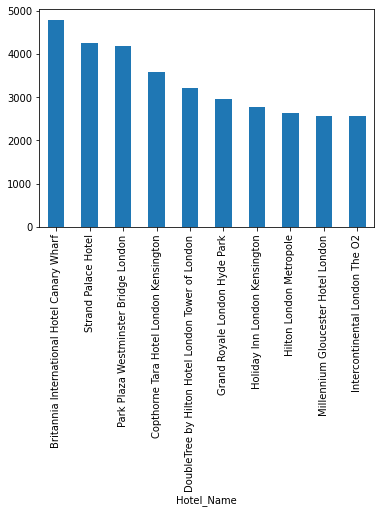

In [154]:
print(df['Hotel_Name'].value_counts()[0:10])
Top_10 = df.groupby('Hotel_Name').size().sort_values(ascending=False)[0:10]
Top_10.plot.bar()

### What are the nationalitites of the Hotels?

In [37]:
nat = df['Hotel_Address'].str.split()


In [53]:
nationality = []
for i in  nat:
    nationality.append(i[-2]+" "+i[-1])


In [57]:
df['Nationality'] = nationality

In [61]:
df['Nationality'].value_counts()

United Kingdom           262301
Barcelona Spain           60149
Paris France              59928
Amsterdam Netherlands     57214
Vienna Austria            38939
Milan Italy               37207
Name: Nationality, dtype: int64

The nationalities of the hotels are: United Kingdom, Spain, France, Netherlands, Austria and Italy

### Where are each Hotel for nationality?

In [62]:
import folium

In [151]:
def show_hotels_map(num):
    Location = ""
    dic = {'United Kingdom': [51.5072, -0.1275], 'Barcelona Spain': [41.3879,  2.16992], 'Paris France':[48.85341, 2.3488], 'Amsterdam Netherlands': [ 52.3738, 4.89093], 'Vienna Austria': [47.516231, 14.550072], 'Milan Italy': [45.4637, 9.18817]}
    if num == 1:
        Location = 'United Kingdom'
    elif num == 2 :
        Location = 'Barcelona Spain'
    elif num == 3 :
        Location = 'Paris France'
    elif num == 4 :
        Location = 'Amsterdam Netherlands'
    elif num == 5 :
        Location = 'Vienna Austria'
    elif num == 6 : 
        Location = 'Milan Italy'
    else:
        Location = 'United Kingdom'
    
    lat_log= df.loc[df['Nationality']==Location, ["lat","lng","Hotel_Name"]]
    lat_log_wo_duplicates = lat_log.drop_duplicates(keep='last').dropna()
    folium_map = folium.Map(location=[dic[Location][0], dic[Location][1]], zoom_start=13, tiles="OpenStreetMap")
    for i in range(len(lat_log_wo_duplicates)):
        marker = folium.CircleMarker(location=[lat_log_wo_duplicates["lat"].iloc[i],lat_log_wo_duplicates["lng"].iloc[i]],radius=5,color="blue", tooltip=lat_log_wo_duplicates["Hotel_Name"].iloc[i], fill=True)
        marker.add_to(folium_map)
    return folium_map

### To show the location of the hotels according to their Nationality select the number of each country.

- 1 -> United Kingdom
- 2 -> Spain
- 3 -> France 
- 4 -> Netherlands 
- 5 -> Austria 
- 6 -> Italy 

In [153]:
show_hotels_map(2)

### What is the nationality of top 10 hotels with most reviews?

In [163]:
for i in Top_10.index:
    print(i+" - Nationality: " +df[df['Hotel_Name'] == i]['Nationality'].iloc[0])

Britannia International Hotel Canary Wharf - Nationality: United Kingdom
Strand Palace Hotel - Nationality: United Kingdom
Park Plaza Westminster Bridge London - Nationality: United Kingdom
Copthorne Tara Hotel London Kensington - Nationality: United Kingdom
DoubleTree by Hilton Hotel London Tower of London - Nationality: United Kingdom
Grand Royale London Hyde Park - Nationality: United Kingdom
Holiday Inn London Kensington - Nationality: United Kingdom
Hilton London Metropole - Nationality: United Kingdom
Millennium Gloucester Hotel London - Nationality: United Kingdom
Intercontinental London The O2 - Nationality: United Kingdom


Top 10 hotels with most reviews are from United Kingdom, regardless of the type of review, these can be considered the most famous among all hotels.

### What is Top 10 hotels with best average score ?

In [207]:
def top_10_best_average_Loc(num):
    Location = ""
    if num == 1:
        Location = 'United Kingdom'
    elif num == 2 :
        Location = 'Barcelona Spain'
    elif num == 3 :
        Location = 'Paris France'
    elif num == 4 :
        Location = 'Amsterdam Netherlands'
    elif num == 5 :
        Location = 'Vienna Austria'
    elif num == 6 : 
        Location = 'Milan Italy'
    else:
        Location = 'United Kingdom'

    Top10BestAvg = df[df['Nationality'] ==  Location][['Hotel_Name', 'Average_Score']].drop_duplicates(keep='last').sort_values('Average_Score', ascending=False)[0:10]
    Top10BestAvg = Top10BestAvg.set_index('Hotel_Name')
    Top10BestAvg['Average_Score'] = np.round(Top10BestAvg['Average_Score'],2)
    Top10BestAvg = Top10BestAvg.style.set_caption(Location)
    return Top10BestAvg


### To show the Top 10 hotels with the best scoring, according to their Nationality select the number of each country.

- 1 -> United Kingdom
- 2 -> Spain
- 3 -> France 
- 4 -> Netherlands 
- 5 -> Austria 
- 6 -> Italy 

In [208]:
top_10_best_average_Loc(2)

,Average_Score
Hotel_Name,
H10 Casa Mimosa 4 Sup,9.600000
Hotel Casa Camper,9.600000
Hotel The Serras,9.600000
Mercer Hotel Barcelona,9.500000
Catalonia Square 4 Sup,9.400000
The Wittmore Adults Only,9.400000
Hotel Margot House,9.400000
Hotel Palace GL,9.400000
Catalonia Magdalenes,9.400000


## Recommended System

In [223]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tuto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [233]:
df['Nationality'] = df['Nationality'].str.replace('United Kingdom', 'UK')

In [234]:
df['Nationality'] = df['Nationality'].str.replace('Barcelona Spain', 'Spain')

In [235]:
df['Nationality'] = df['Nationality'].str.replace('Paris France', 'France')
df['Nationality'] = df['Nationality'].str.replace('Amsterdam Netherlands', 'Netherlands')
df['Nationality'] = df['Nationality'].str.replace('Vienna Austria', 'Austria')
df['Nationality'] = df['Nationality'].str.replace('Milan Italy', 'Italy')

Eliminate the city of nationality to leave only the country

In [241]:
df['Nationality'].unique()

array(['Netherlands', 'UK', 'France', 'Spain', 'Italy', 'Austria'],
      dtype=object)

In [237]:
df.drop(['Additional_Number_of_Scoring',
       'Review_Date','Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng'],1,inplace=True)

Now, drop the variables that will not use to create the recommend system.

In [238]:
def impute(column):
    column = column[0]
    if (type(column) != list):
        return "".join(literal_eval(column))
    else:
        return column
    
df["Tags"] = df[["Tags"]].apply(impute, axis=1)

The column 'Tags' contained words in a list separated by comas (,), with impute function, convert those lists to strings. Joining each word to create the string.

In [243]:
df['Tags'].head()

0     Leisure trip  Couple  Duplex Double Room  Sta...
1     Leisure trip  Couple  Duplex Double Room  Sta...
2     Leisure trip  Family with young children  Dup...
3     Leisure trip  Solo traveler  Duplex Double Ro...
4     Leisure trip  Couple  Suite  Stayed 2 nights ...
Name: Tags, dtype: object

Now, I will lowercase the "Tags" and  "Nationality" column for simplicity:

In [245]:
df['Nationality'] = df['Nationality'].str.lower()
df['Tags'] = df['Tags'].str.lower()

### The idea is to recommend the hotel based on the location given by the user and the reservation reason. The system will receive this information and will recommend the hotel, with its address, its average rating according to the rating of other users.

In [249]:
def recommend_system_hotel(location, reason):
    reason = reason.lower()
    word_tokenize(reason)
    
    stop_words = stopwords.words('english')
    
    lemm = WordNetLemmatizer()
    
    filtered  = {word for word in reason if not word in stop_words}
    filtered_set = set()
    
    for fs in filtered:
        filtered_set.add(lemm.lemmatize(fs))

    country = df[df['Nationality']== location.lower()]
    country = country.set_index(np.arange(country.shape[0]))

    cos = []
    
    for i in range(country.shape[0]):
        temp_token = word_tokenize(country["Tags"][i])
        temp_set = [word for word in temp_token if not word in stop_words]
        temp2_set = set()
        
        for s in temp_set:
            temp2_set.add(lemm.lemmatize(s))
        
        vector = temp2_set.intersection(filtered_set)
        
        cos.append(len(vector))
    
    country['similarity'] = cos
    country = country.sort_values(by='similarity', ascending=False)
    country.drop_duplicates(subset='Hotel_Name', keep='first', inplace=True)
    country.sort_values('Average_Score', ascending=False, inplace=True)
    country.reset_index(inplace=True)
    
    return country[["Hotel_Name", "Average_Score", "Hotel_Address"]].head()

## It works?

Try out the function with location and the reservation reason as parameters.

In [250]:
recommend_system_hotel('Italy', 'I am going for a business trip')

,Hotel_Name,Average_Score,Hotel_Address
0,Excelsior Hotel Gallia Luxury Collection Hotel,9.4,Piazza Duca D Aosta 9 Central Station 20124 Mi...
1,Palazzo Parigi Hotel Grand Spa Milano,9.3,Corso Di Porta Nuova 1 Milan City Center 20121...
2,Hotel Spadari Al Duomo,9.3,Via Spadari 11 Milan City Center 20123 Milan I...
3,Room Mate Giulia,9.3,Silvio Pellico 4 Milan City Center 20121 Milan...
4,UNA Maison Milano,9.3,Via Mazzini 4 Milan City Center 20123 Milan Italy


In [251]:
recommend_system_hotel('Austria',"I want a family vacation time. A room with 3 rooms for 2 weeks. Also a bed king size")

,Hotel_Name,Average_Score,Hotel_Address
0,Hotel Sacher Wien,9.5,Philharmoniker Stra e 4 01 Innere Stadt 1010 V...
1,Palais Coburg Residenz,9.5,Coburgbastei 4 01 Innere Stadt 1010 Vienna Aus...
2,Best Western Premier Kaiserhof Wien,9.4,Frankenberggasse 10 04 Wieden 1040 Vienna Austria
3,The Guesthouse Vienna,9.4,F hrichgasse 10 01 Innere Stadt 1010 Vienna Au...
4,Boutiquehotel Das Tyrol,9.4,Mariahilfer Stra e 15 06 Mariahilf 1060 Vienna...
